In [2]:
import sys
sys.path.append('../build/')
%pylab inline
np.set_printoptions(precision=4, suppress=True)
import versor as vsr

Populating the interactive namespace from numpy and matplotlib


# CGA

In [12]:
B = vsr.Dll(tan(pi/12),0,0,0,0,1)
# B = (vsr.Vec(0,0,1).trs() * (vsr.Biv(1,0,0).unit() * (pi/6.0)).exp()).log()
# print(B)

In [13]:
def Cayley(B):
    Rp = vsr.Mot(1.0, B[0], B[1], B[2], B[3], B[4], B[5], 0.0)
    Rn = vsr.Mot(1.0, -B[0], -B[1], -B[2], -B[3], -B[4], -B[5], 0.0)
    return Rp * Rn.inv()

In [14]:
def CayleyLi(B):
    BB = B * B
    Rp = vsr.Mot(1.0, B[0], B[1], B[2], B[3], B[4], B[5], 0.0)
    R0 = vsr.Mot(1.0 - BB[0], 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
    R4 = vsr.Mot(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, BB[7])
    Rn = R0 + R4
    Rden = R0 * R0 
    return Rp * Rp * Rn * Rden.inv()

In [15]:
def CayleySelig(B):
    Rp = vsr.Mot(1.0, B[0], B[1], B[2], 0.0, 0.0, 0.0, 0.0)
    Rn = vsr.Mot(1.0, -B[0], -B[1], -B[2], 0.0, 0.0, 0.0, 0.0)
    Rninv = Rn.inv()
    eps = vsr.Mot(0,0,0,0,0,0,0,-1)
    b = vsr.Mot(0.0, B[5], -B[4], B[3], 0.0, 0.0, 0.0, 0.0)
    return Rp * Rninv + eps * Rninv * b * Rninv * 2

In [16]:
R1 = Cayley(B)
print(R1)
print(R1 * R1.rev())

Mot: [ 0.87 0.5 0 0 0 0 1.9 0.5 ]
Mot: [ 1 0 0 0 0 0 0 -1 ]


In [18]:
Rs = CayleySelig(B)
print(np.array(Rs))

[ 0.866  0.5    0.     0.     0.     0.     1.616  0.933]


In [10]:
one = vsr.Mot(1,0,0,0,0,0,0,0)
np.array((Rs - one)*(Rs + one).inv())

array([ 0.    , -0.5236,  0.    ,  0.    ,  0.    ,  0.    , -0.2848,  0.    ])

In [184]:
np.array(B)

array([-0.5236,  0.    ,  0.    ,  0.    ,  0.    , -0.5   ])

In [185]:
R2 = CayleyLi(B)
print(R2)

Mot: [ 0.57 -0.82 0 0 0 0 -0.45 0.65 ]


In [189]:
d = vsr.Rot(1,B[0],B[1],B[2]) 
dn = 1.0  / sqrt((d * d.rev())[0])

In [190]:
O = (vsr.Mot(1.0, B[0], B[1], B[2], B[3], B[4], B[5], 0.0) + (B^B * 0.5)) * dn
print(O)
print(O * O.rev())

Mot: [ 0.89 -0.46 0 0 0 0 -0.44 0.23 ]
Mot: [ 1 0 0 0 0 0 1.4e-17 0 ]


In [188]:
vsr.Dll(1,2,3,4,5,6).drv().vec().unduale()

Biv: [ 6 -5 4 ]

In [14]:
B1 = B.biv()
B2 = vsr.Vec(B[3],B[4],B[5]).unduale()
B1 <= B2 + B2 <= B1

-0.5235987755982988

In [15]:
w = B.biv().norm()
B2 = (B * B)[0]
B4 = B2 * B2



In [16]:
vsr.Vec(1,2,3).trs() * vsr.Biv(pi/6,0,0).exp()

Mot: [ 0.87 -0.5 0 0 -0.93 -0.62 -1.3 0.75 ]

In [17]:
a = vsr.Mot(0,1,2,3,0,0,0,0) * 0.5
I = vsr.Mot(0,0,0,0,0,0,0,1)

In [18]:
Rp = vsr.Rot(1.0,B.biv()[0], B.biv()[1], B.biv()[2])
Rn = vsr.Rot(1.0,-B.biv()[0], -B.biv()[1], -B.biv()[2])
Rp * Rn.inv()

Rot: [ 0.57 -0.82 0 0 ]

In [19]:
Rs.rot()

Rot: [ 0.57 -0.82 0 0 ]

In [53]:
R1 = vsr.Biv(pi/6,0,0).exp()
R2 = vsr.Biv(0,pi/5,0).exp()
R = R2 * R1.rev()
print(R)

Rot: [ 0.7 0.4 -0.51 -0.29 ]


In [54]:
pi/2 - pi/6 

1.0471975511965979

In [55]:
pi/3

1.0471975511965976

In [56]:
th = R.log().norm()

In [57]:
d_geod = (R2 * R1.rev()).log().norm()

In [58]:
d_geod

0.7945172960545189

In [59]:
np.arccos((R2 * R1.rev())[0])

0.79451729605451904

In [60]:
np.sqrt(np.linalg.norm(np.array(R2)-np.array(R1)))

0.87964985063109769

In [61]:
2 * sin(th / 4)

0.39465158173434151

In [62]:
np.linalg.norm(np.array(R2)+np.array(R1))

1.8442501290345825

In [63]:
np.sqrt(np.inner(R2,R1))

0.83703600234520192

In [64]:
cos(pi/4)

0.70710678118654757

In [99]:
np.linalg.norm(vsr.EGA(R) - vsr.EGA(vsr.Rot(1,0,0,0)))

0.77378385971531249

In [101]:
cos(th) - 1

-0.29937073077796306

In [104]:
np.sqrt(np.sum([(vsr.EGA(R) - vsr.EGA(vsr.Rot(1,0,0,0)))[i]**2 for i in range(8)]))

0.77378385971531249

In [75]:
np.linalg.norm(vsr.EGA(R2) - vsr.EGA(R1))

0.77378385971531249

In [77]:
2 * sin(th/2)

0.77378385971531238

In [81]:
ct = np.cos(th/2)
st = np.sin(th/2)

In [86]:
(ct**2 - 2*ct + 1 + st**2) * 4

0.6229994838616707

In [95]:
sqrt((ct - 1)**2) + np.linalg.norm(R.biv())

0.79140042704513003

In [106]:
np.inner(R.biv(),R.biv())

0.50911862710939471

In [110]:
sqrt((1 - R[0])**2 + R[1]**2 + R[2]**2 + R[3]**2)

0.77378385971531249

In [116]:
(1 - R[0])**2 + R[1]**2 + R[2]**2 + R[3]**2

0.5987414615559264

In [117]:
(1 - R[0])**2

0.0896228344465317

In [124]:
(cos(th) - 1)**2 + sin(th)**2

0.59874146155592611

In [129]:
1 - 2 * cos(th) + cos(th)**2 + sin(th)**2

0.59874146155592611

In [130]:
cos(th)**2 + sin(th)**2

1.0

In [135]:
sqrt(2 * (1 - cos(th)))

0.77378385971531227

In [147]:
2 * sin(th/2)

0.77378385971531238

(0, 4)

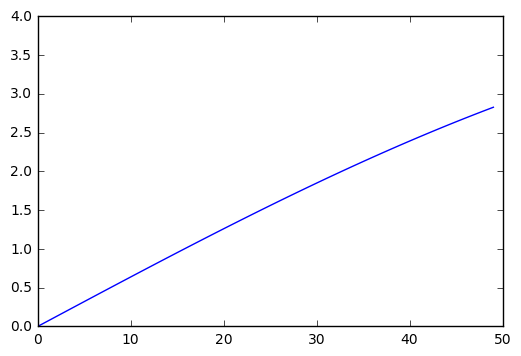

In [149]:
plt.plot(2 * (2 * sin(np.linspace(0,pi)/4)))
plt.ylim(0,4)

(0, 10)

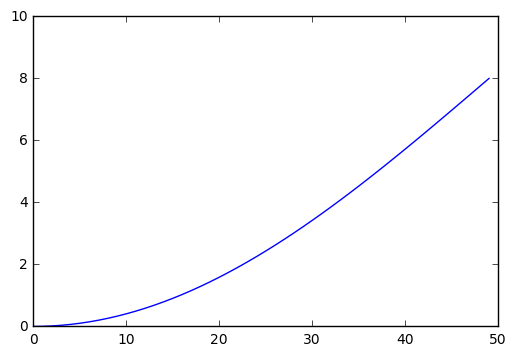

In [146]:
plt.plot(4 * (2 * sin(np.linspace(0,pi)/4))**2)
plt.ylim(0,10)

In [142]:
np.linspace(0,pi)

array([ 0.    ,  0.0641,  0.1282,  0.1923,  0.2565,  0.3206,  0.3847,
        0.4488,  0.5129,  0.577 ,  0.6411,  0.7053,  0.7694,  0.8335,
        0.8976,  0.9617,  1.0258,  1.0899,  1.1541,  1.2182,  1.2823,
        1.3464,  1.4105,  1.4746,  1.5387,  1.6029,  1.667 ,  1.7311,
        1.7952,  1.8593,  1.9234,  1.9875,  2.0517,  2.1158,  2.1799,
        2.244 ,  2.3081,  2.3722,  2.4363,  2.5005,  2.5646,  2.6287,
        2.6928,  2.7569,  2.821 ,  2.8851,  2.9493,  3.0134,  3.0775,
        3.1416])

In [67]:
np.array(R2) - np.array(R1)

array([-0.057 ,  0.5   , -0.5878,  0.    ])

In [ ]:
R2

In [ ]:
R1

In [ ]:
np.linalg.norm(R2)

In [ ]:
vsr.EGA(Rs.rot()) - vsr.EGA(1,0,0,0,0,0,0,0) * (vsr.EGA(Rs.rot()) + vsr.EGA(1,0,0,0,0,0,0,0)).inv()

In [ ]:
vsr.EGA(Rs.rot()) - vsr.EGA(1,0,0,0,0,0,0,0)

In [ ]:
(vsr.EGA(Rs.rot()) + vsr.EGA(1,0,0,0,0,0,0,0)).inv()

In [ ]:
Rs + one

In [ ]:
Rs - one

In [ ]:
(Rs + one).rev()

In [ ]:
(Rs + one).inv()

In [ ]:
A = (Rs + 1) * (Rs-one).inv()

In [ ]:
CayleySelig(A)

In [ ]:
CayleySelig(A) * CayleySelig(A).rev()

In [ ]:
vsr.Vec(0,0,0).null().spin(CayleySelig(A))

In [ ]:
CayleySelig(B)

In [ ]:
I * a

In [152]:
M = B.exp()

In [162]:
B1 = (vsr.Vec(0,0,1).trs() * (vsr.Biv(1,0,0).unit() * (pi/6.0)).exp()).log()
M1 = B1.exp()
B2 = (vsr.Vec(0,0,2).trs() * (vsr.Biv(1,0,0).unit() * (pi/4.0)).exp()).log()
M2 = B2.exp()

In [163]:
M = M2 * M1.rev()

In [164]:
np.linalg.norm(np.array(M) - np.array([1,0,0,0,0,0,0,0]))

0.56404640537979089

In [174]:
np.linalg.norm(np.array(M2.rot() * M1.rev().rot()))

0.99999999999999989

In [175]:
 np.linalg.norm(np.array(M2.rot())) * np.linalg.norm(np.array(M1.rev().rot()))

1.0